#About Dataset

Predict attrition of your valuable employees.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

#Aim: ouliers detection

In [48]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(2)
from tensorflow.random import set_seed
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/GIT_AI/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/GIT_AI


#Exploratory data analysis 

In [3]:
df = pd.read_csv('DATA/Employee.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.tail().transpose()

,1465,1466,1467,1468,1469
Age,36,39,27,49,34
Attrition,No,No,No,No,No
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,884,613,155,1023,628
Department,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,23,6,4,2,8
Education,2,1,3,3,3
EducationField,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,2061,2062,2064,2065,2068


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Dropping non-informative features**

In [5]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

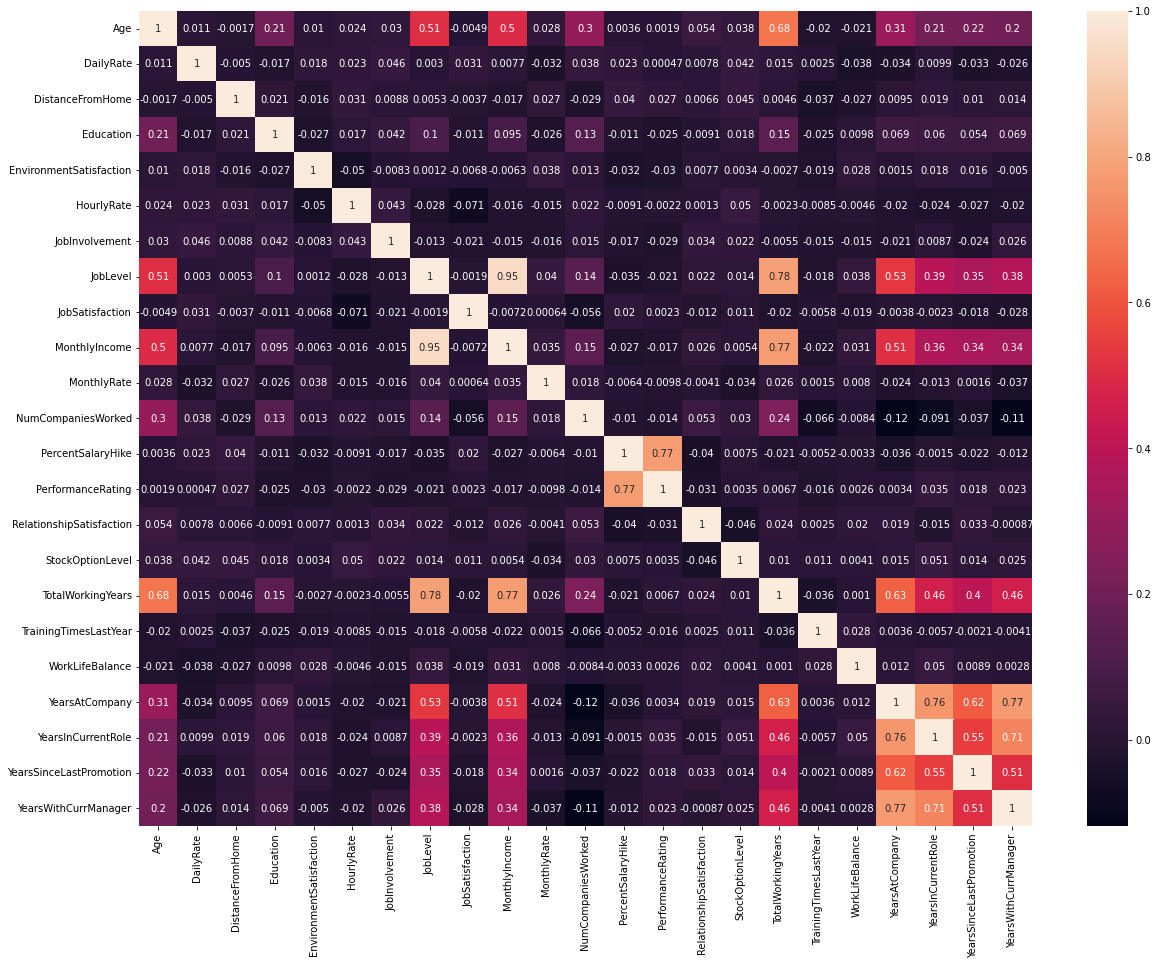

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [5]:
sorted(df['Attrition'].unique())

['No', 'Yes']

In [6]:
df['Attrition'] = df['Attrition'].map({'Yes': 1,'No': 0})

In [ ]:
sorted(df['BusinessTravel'].unique())

['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

In [7]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Frequently': 2, 'Travel_Rarely': 1,'Non-Travel': 0})

In [ ]:
sorted(df['Gender'].unique())

['Female', 'Male']

In [8]:
df['Gender'] = df['Gender'].map({'Female': 1,'Male': 0})

In [ ]:
sorted(df['OverTime'].unique())

['No', 'Yes']

In [9]:
df['OverTime'] = df['OverTime'].map({'Yes': 1,'No': 0})

In [ ]:
sorted(df['Department'].unique())

['Human Resources', 'Research & Development', 'Sales']

In [ ]:
sorted(df['EducationField'].unique())

['Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree']

In [ ]:
sorted(df['JobRole'].unique())

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [ ]:
sorted(df['MaritalStatus'].unique())

['Divorced', 'Married', 'Single']

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(df[['Department', 'EducationField', 'JobRole', 'MaritalStatus']])
ohe_columns = [num for sublist in ohe.categories_ for num in sublist[1:]]
ohe_df = pd.DataFrame(ohe.transform(df[['Department', 'EducationField', 'JobRole', 'MaritalStatus']]).toarray(), columns=ohe_columns) #, columns=ohe.categories_
df = df.join(ohe_df)
df = df.drop(['Department', 'EducationField', 'JobRole', 'MaritalStatus'], axis=1)

In [ ]:
sorted(df['Over18'].unique())

['Y']

In [11]:
df = df.drop(['Over18'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobSatisfaction           1470 non-null   int64  
 12  MonthlyIncome             1470 non-null   int64  
 13  MonthlyRate               1470 non-null   int64  
 14  NumCompa

#Scaling dataset

In [13]:
scaler = MinMaxScaler()

In [14]:
scaled_df = scaler.fit_transform(df.values)

#Model

In [89]:
def reset_random_seeds(seeds=11):
   set_seed(seeds)
   np.random.seed(seeds)
   random.seed(seeds)

In [148]:
reset_random_seeds()

In [149]:
encoder = Sequential()
encoder.add(Dense(22, activation="relu", input_shape=[44]))
encoder.add(Dense(10, activation="relu"))
encoder.add(Dense(5, activation="relu"))
encoder.add(Dense(2, activation="relu"))

In [150]:
decoder = Sequential()
decoder.add(Dense(5, activation='relu', input_shape=[2]))
decoder.add(Dense(10, activation='relu'))
decoder.add(Dense(22, activation='relu'))
decoder.add(Dense(44, activation='relu'))

In [151]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=SGD(learning_rate=0.1))

In [152]:
autoencoder.fit(scaled_df, scaled_df, batch_size=128, epochs=30)

Epoch 1/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2277
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.2139
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.2027
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1806
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1732
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1710
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1693
Epoch 11/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1681
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1672
Epoch 13/30
12/12 [==============================

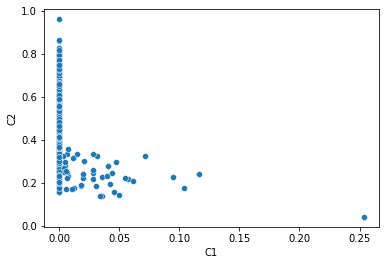

In [153]:
encoded_2dim = encoder.predict(scaled_df)
results = pd.DataFrame(data=encoded_2dim, columns=['C1', 'C2'])
sns.scatterplot(x='C1', y='C2', data=results)

In [158]:
aec_res = results

**For anomalies C1 is greater than 0 **

In [154]:
out_aec = df[(results['C1'] > 0)]

In [155]:
out_aec.index

Int64Index([  52,   64,   79,   90,  100,  110,  134,  152,  178,  251,  350,
             411,  503,  509,  526,  537,  584,  605,  633,  651,  653,  655,
             746,  767,  785,  835,  874,  875,  914,  918, 1064, 1093, 1183,
            1200, 1221, 1243, 1280, 1313, 1320, 1347, 1389, 1398, 1400, 1441,
            1447],
           dtype='int64')

In [159]:
results['out'] = 0

In [160]:
results['out'].iloc[out_aec.index] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


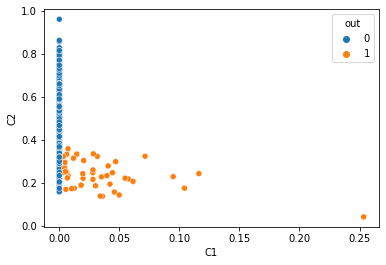

In [161]:
sns.scatterplot(x='C1', y='C2', data=results, hue='out')

#One-Class SVM

In [163]:
svm = OneClassSVM(gamma='auto', nu=0.006) 
results = svm.fit_predict(scaled_df)

In [164]:
out_svm = df[results == -1]
out_svm.index

Int64Index([  63,  127,  171,  362,  411,  427,  469,  595,  630,  656,  748,
             861,  913,  977, 1116, 1400, 1402, 1442],
           dtype='int64')

In [165]:
len(out_svm.index)

18

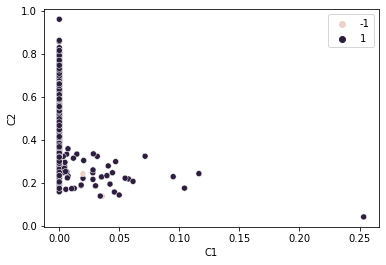

In [166]:
sns.scatterplot(x='C1', y='C2', data=aec_res, hue=results)

#Minimum Covariance Determinant

In [174]:
ee = EllipticEnvelope(contamination=10/len(df)) #searching exactly the same number of anomalies
results = ee.fit_predict(scaled_df)

In [175]:
out_ee = df[results == -1]
out_ee.index

Int64Index([98, 126, 237, 244, 477, 592, 653, 914, 1111, 1116], dtype='int64')

In [169]:
len(out_ee.index)

10

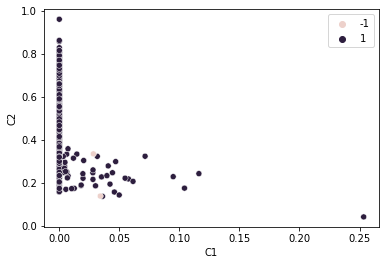

In [178]:
sns.scatterplot(x='C1', y='C2', data=aec_res, hue=results)

In [176]:
set(out_svm.index) & set(out_ee.index)

{1116}

In [172]:
set(out_aec.index) & set(out_svm.index)

{411, 1400}

In [177]:
set(out_aec.index) & set(out_ee.index)

{653, 914}